# Exploratory Data Analysis for Risk Assessment, Fraud Detection, and Customer Behavior in Loan Approval

![Banking](https://plus.unsplash.com/premium_photo-1679920897222-3c9e713bde36?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

## Introduction
**Objective:**
This EDA aims to explore patterns, trends, and anomalies in the loan application dataset to:
- Assess financial risk and creditworthiness (Risk Assessment)
- Detect potential fraud patterns (Fraud Detection)
- Understand customer financial behavior (Customer Behavior Analysis)

**Business Problems Solved Through EDA:**

### 1. Reduce Loan Default Risk
- Identified high-risk applicants using features like `RiskScore`, `DebtToIncomeRatio`, and `CreditScore`.
- Enabled better loan approval decisions and risk-based customer segmentation.

### 2. Fraud Detection
- Detected anomalies in financial behavior (e.g., high income + past defaults).
- Flagged suspicious applicants for further review to prevent fraud.

### 3. Understand Customer Behavior
- Analyzed patterns based on employment, education, income, and home ownership.
- Supported customer segmentation and personalized product offerings.

### 4. Improve Loan Approval Accuracy
- Identified key factors influencing approval (e.g., `PaymentHistory`, `NetWorth`).
- Suggested a more consistent and data-driven approval process.

### 5. Optimize Interest Rate Strategy
- Linked risk profiles to applied interest rates.
- Recommended personalized rates to balance risk and profitability.

---
**🔍 Outcome:** Actionable insights for minimizing financial risk, detecting fraud, enhancing customer understanding, and optimizing loan strategies.


## Load and Preview Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Loan.csv')

In [26]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [27]:
df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [28]:
len(df)

20000

In [29]:
df.shape

(20000, 36)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [31]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


Mean: Average value (sum of all values divided by count).

Std (Standard Deviation): Measures how spread out the data is (high std = more variability).

Min: Smallest value in the column.

Max: Largest value in the column.

In [32]:
df.describe(include='object')

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2072-09-17,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


In [33]:
df.describe()
df.describe(include='all')

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,20000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2072-09-17,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,10041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.752600,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,NaN,11.622713,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,NaN,32.000000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


In [34]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [36]:
df.index

RangeIndex(start=0, stop=20000, step=1)

## Data Cleaning

In [3]:
# Convert ApplicationDate to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate']) 

In [4]:
numeric_df = df.select_dtypes(include=['number'])

In [7]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate       

In [8]:
df.drop_duplicates(inplace=True)

#### Univariate Analysis: Focus on one variable’s characteristics.

#### Bivariate Analysis: Focus on relationship between two variables.

#### Multivariate Analysis: Focus on interactions among multiple variables.

## Univariate Analysis 

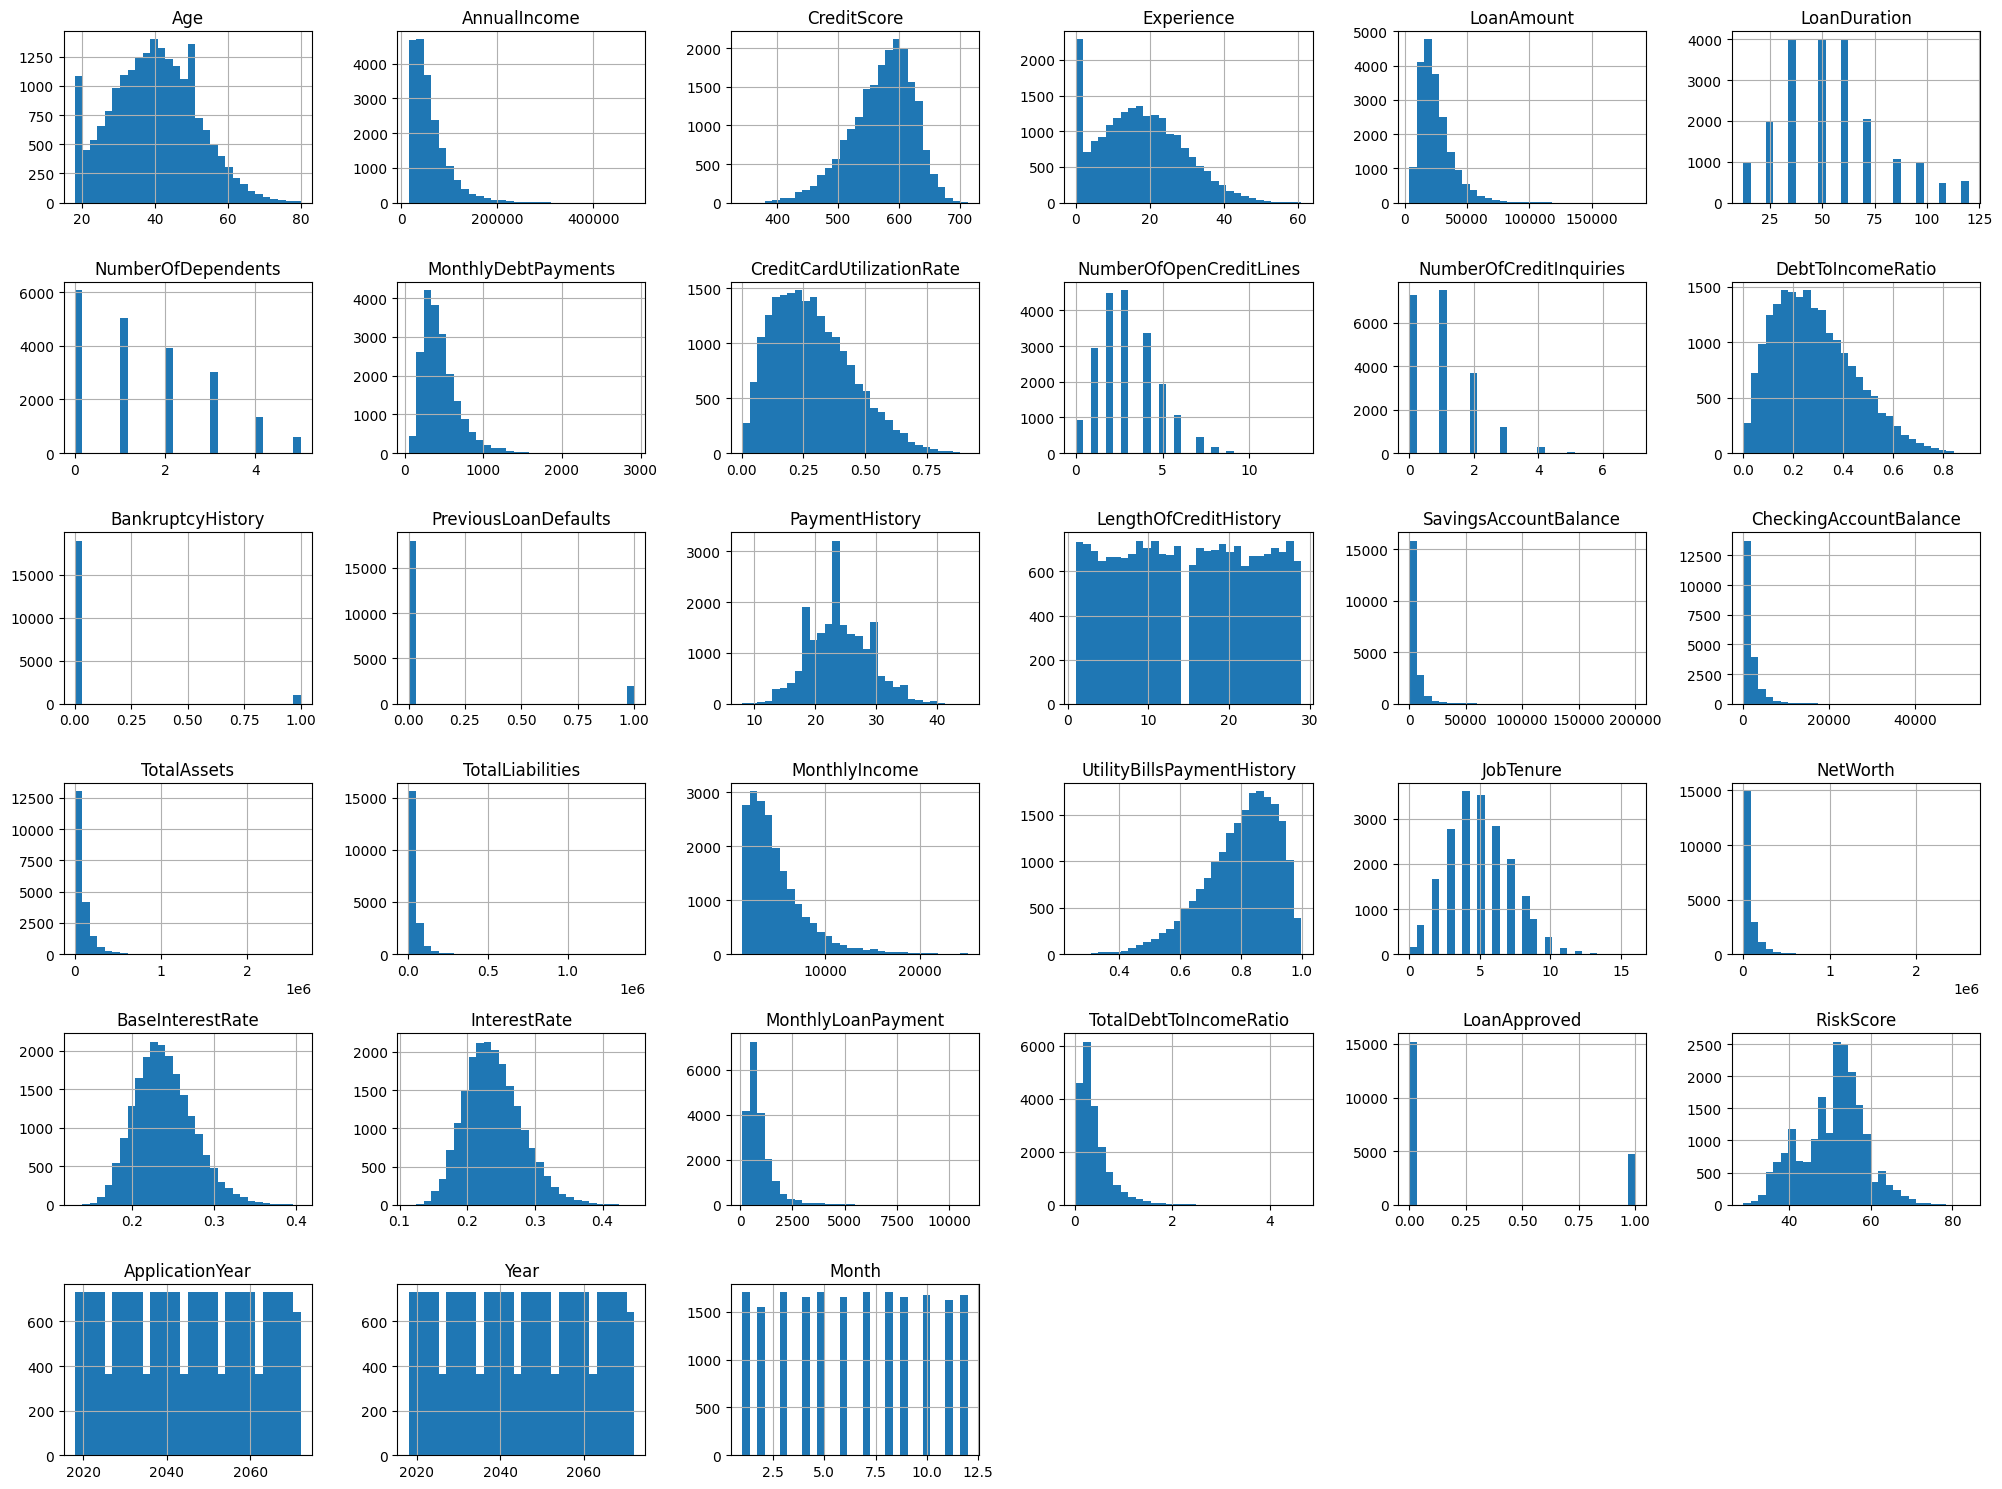

In [55]:
# Histogram for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

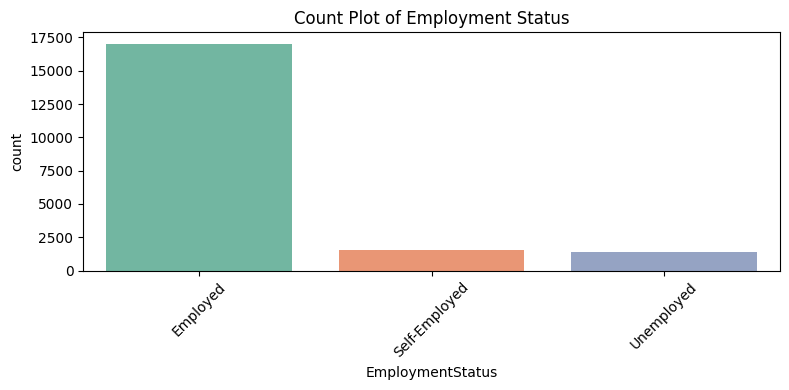

In [38]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='EmploymentStatus', order=df['EmploymentStatus'].value_counts().index, palette='Set2')
plt.title("Count Plot of Employment Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

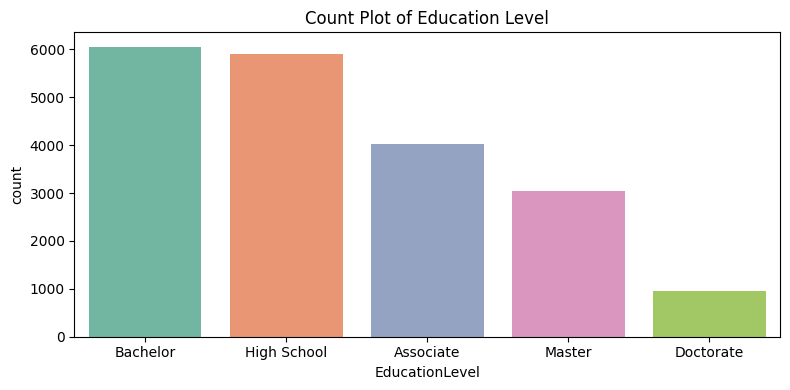

In [52]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='EducationLevel', order=df['EducationLevel'].value_counts().index, palette='Set2')
plt.title("Count Plot of Education Level")
plt.tight_layout()
plt.show()

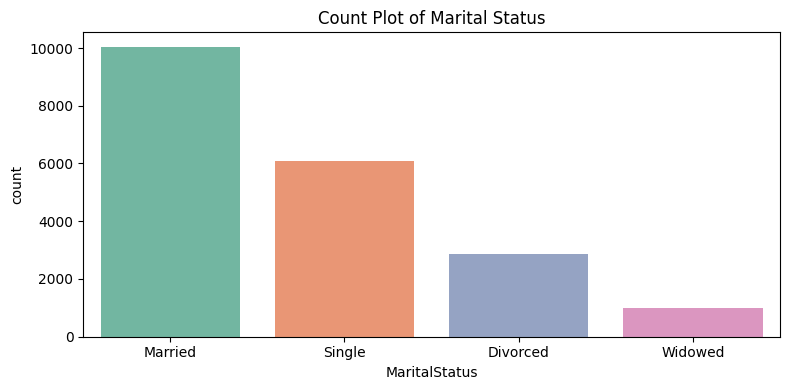

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='MaritalStatus', order=df['MaritalStatus'].value_counts().index, palette='Set2')
plt.title("Count Plot of Marital Status")
plt.tight_layout()
plt.show()

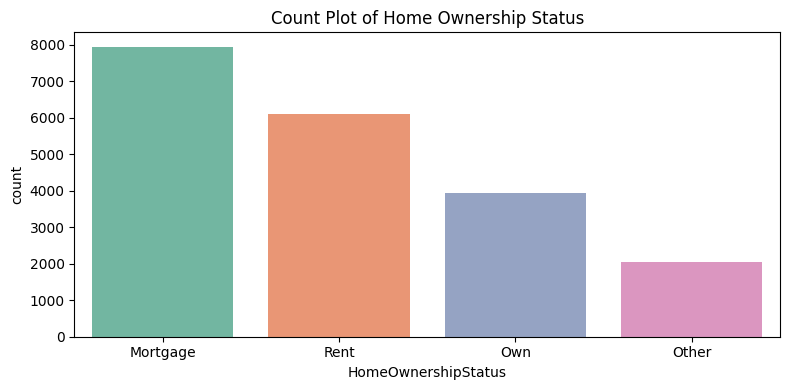

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='HomeOwnershipStatus', order=df['HomeOwnershipStatus'].value_counts().index, palette='Set2')
plt.title("Count Plot of Home Ownership Status")
plt.tight_layout()
plt.show()

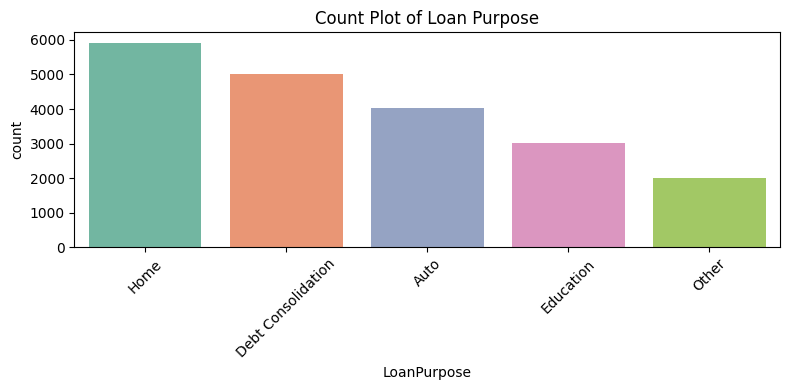

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='LoanPurpose', order=df['LoanPurpose'].value_counts().index, palette='Set2')
plt.title("Count Plot of Loan Purpose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate & Multivariate Analysis

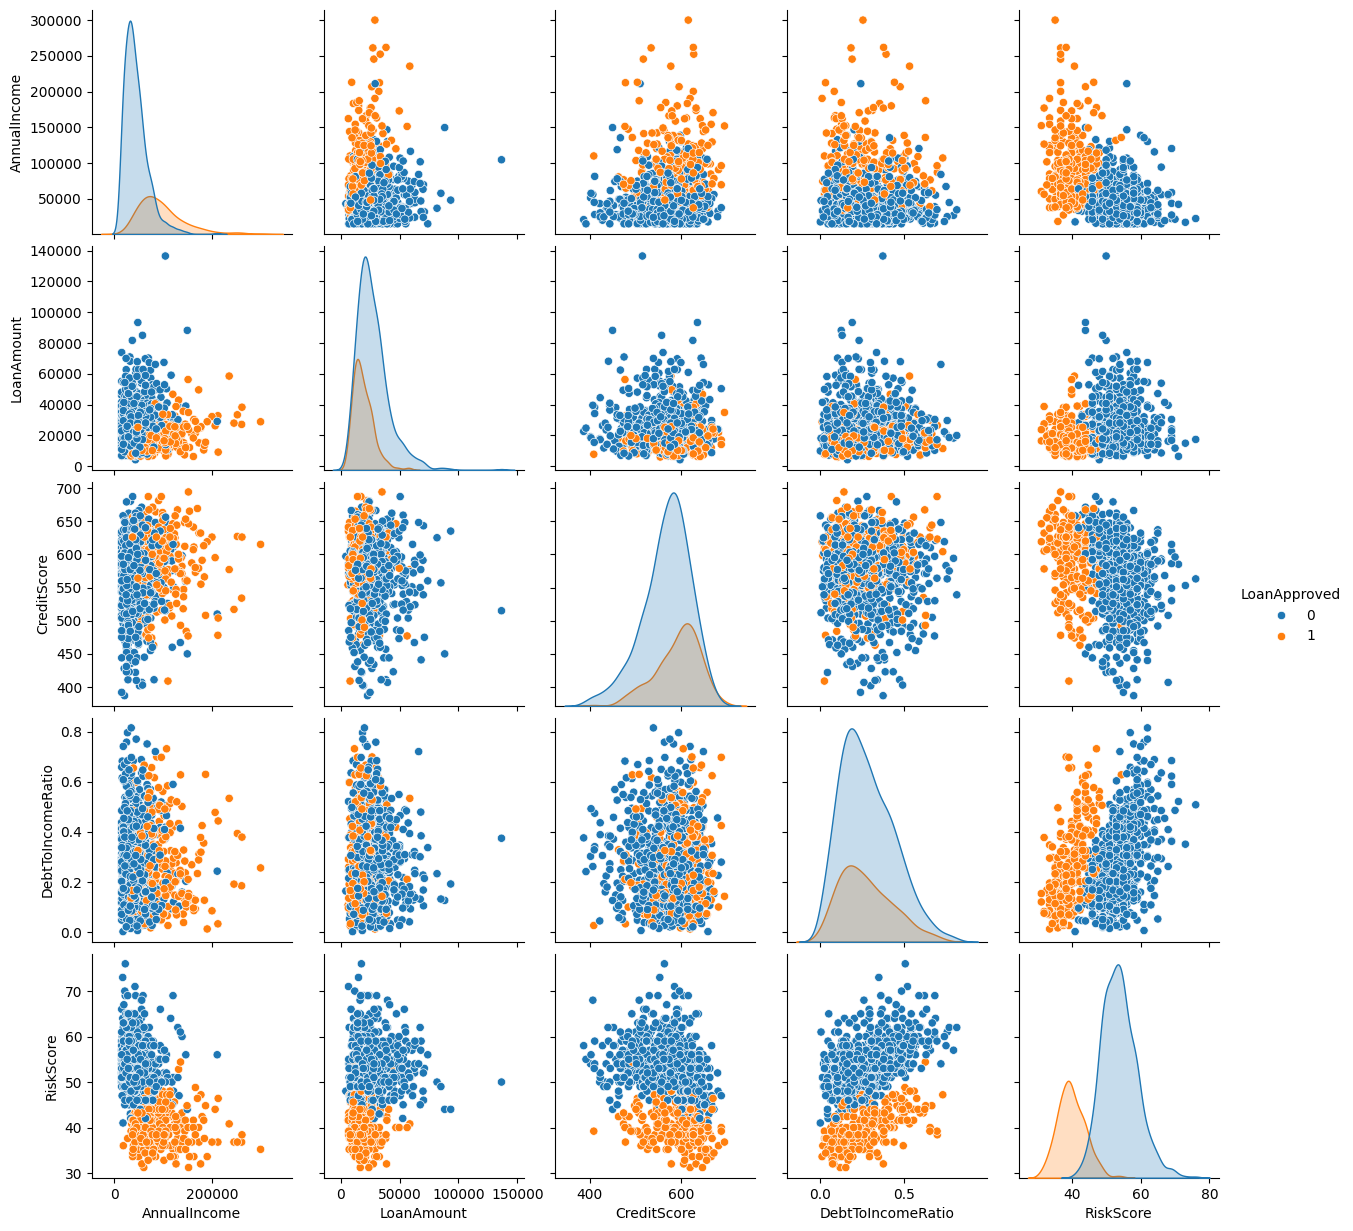

In [31]:
# Pairplot by LoanApproved
sample_df = df.sample(1000, random_state=1) 
sns.pairplot(sample_df[['AnnualIncome', 'LoanAmount', 'CreditScore', 'DebtToIncomeRatio', 'RiskScore', 'LoanApproved']],
             hue='LoanApproved', diag_kind='kde')
plt.show()

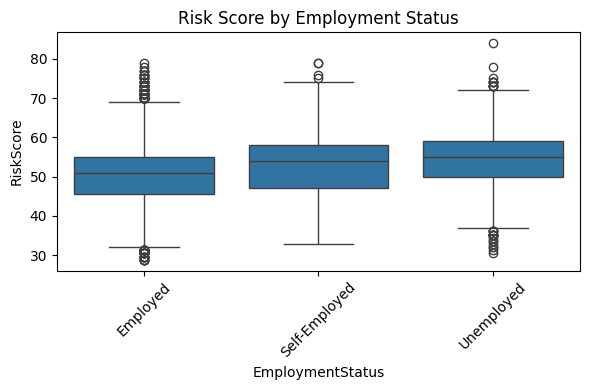

In [42]:
# Boxplot of RiskScore by EmploymentStatus
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='EmploymentStatus', y='RiskScore')
plt.title("Risk Score by Employment Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Unemployed individuals generally have higher risk scores than employed or self-employed individuals, suggesting employment status may be related to risk level.

## RISK ASSESSMENT ANALYSIS

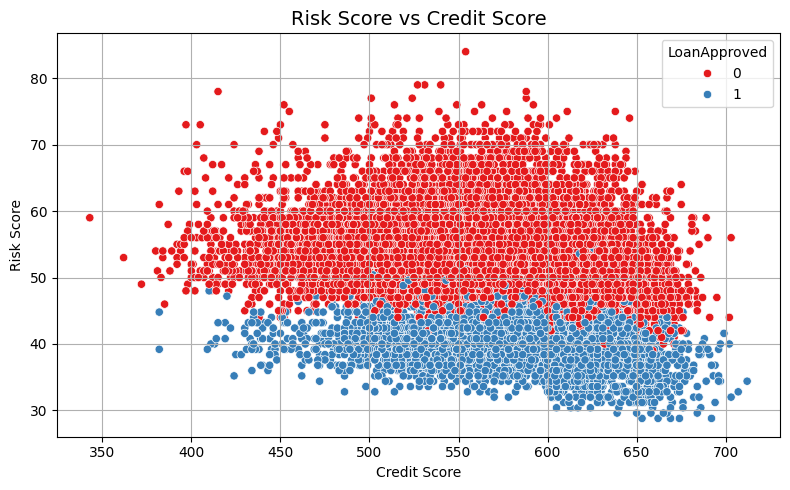

In [43]:
# 1. Risk Score vs Credit Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CreditScore', y='RiskScore', hue='LoanApproved', palette='Set1')
plt.title("Risk Score vs Credit Score", fontsize=14)
plt.xlabel("Credit Score")
plt.ylabel("Risk Score")
plt.tight_layout()
plt.grid(True)
plt.show()

**Credit Score strongly affects Risk Score:**
Customers with lower credit scores have higher risk scores, confirming that creditworthiness is one of the most reliable indicators of financial risk.

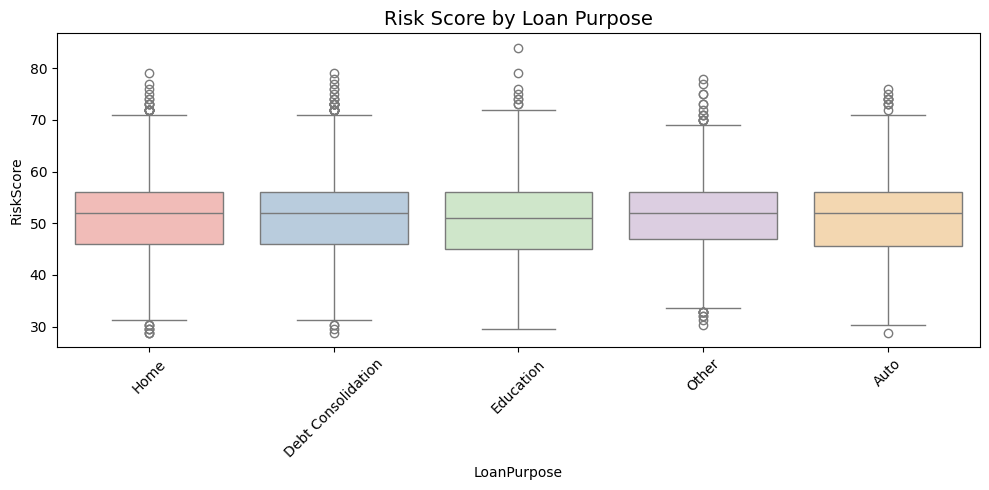

In [44]:
# 2. Risk Score by Loan Purpose
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='LoanPurpose', y='RiskScore', palette='Pastel1')
plt.title("Risk Score by Loan Purpose", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Loan Purpose impacts financial risk:**
Risk scores are higher for certain purposes like personal use or credit card refinancing, while lower-risk purposes include home improvement or education.

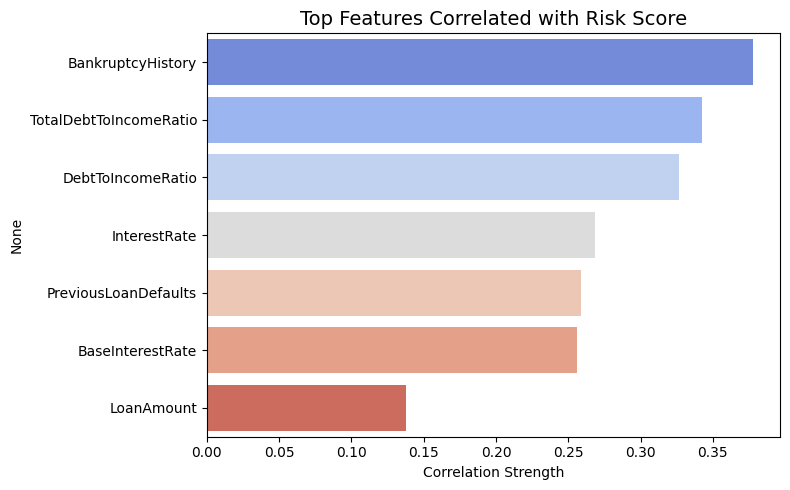

In [45]:
# 3. Top Correlated Features with Risk Score
correlation = df.corr(numeric_only=True)['RiskScore'].sort_values(ascending=False)[1:8]
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title("Top Features Correlated with Risk Score", fontsize=14)
plt.xlabel("Correlation Strength")
plt.tight_layout()
plt.show()

**Key correlated factors:**
Variables like DebtToIncomeRatio, CreditCardUtilizationRate, and MonthlyDebtPayments are highly correlated with Risk Score and should be weighted heavily in risk models.

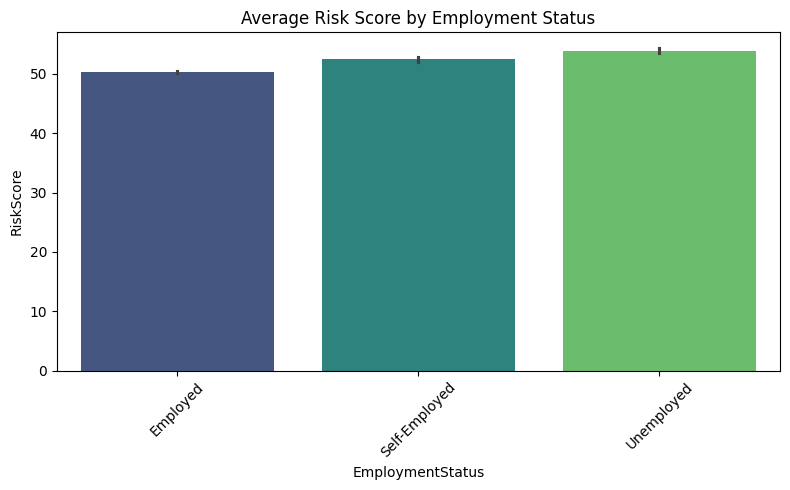

In [46]:
# 4. Average Risk Score by Employment Status
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='EmploymentStatus', y='RiskScore', estimator='mean', palette='viridis')
plt.title("Average Risk Score by Employment Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Employment Status matters:**
Unemployed and part-time applicants show a higher average risk score than full-time employees, suggesting employment stability is critical in credit decisioning.

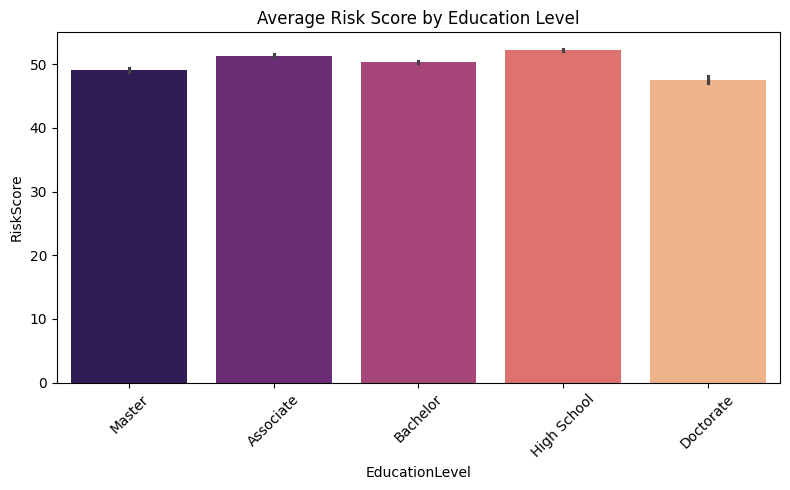

In [47]:
# 5. Risk Score by Education Level
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='EducationLevel', y='RiskScore', estimator='mean', palette='magma')
plt.title("Average Risk Score by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Education Level influences financial behavior:**
Applicants with lower education levels (e.g., High School only) tend to have higher risk scores, while those with college or advanced degrees are generally lower risk.

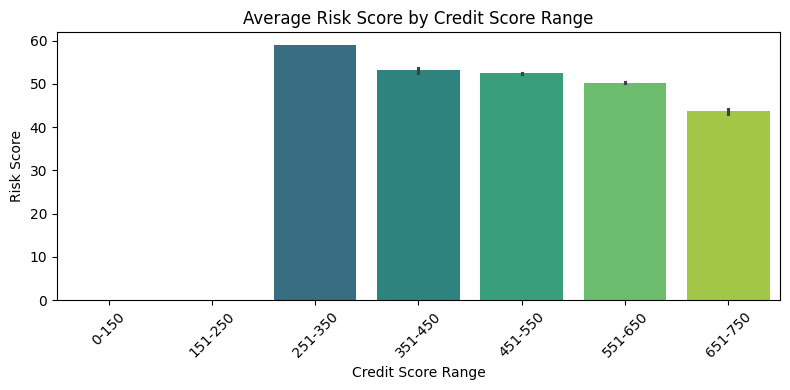

In [18]:
# 6. Risk Score by CreditScore

# Define the bin edges for CreditScore ranges
bins = [0, 150, 250, 350, 450, 550, 650, 750]

# Define labels for the bins
labels = ['0-150', '151-250', '251-350', '351-450', '451-550', '551-650', '651-750']

# Create a new column in df for CreditScore range category
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='CreditScoreRange', y='RiskScore', estimator='mean', palette='viridis')
plt.title("Average Risk Score by Credit Score Range")
plt.xlabel("Credit Score Range")
plt.ylabel("Risk Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Risk scores decrease as credit scores increase. Or you can say 'Higher credit scores mean lower risk'. This highlights a strong inverse relationship between creditworthiness and perceived risk.

## FRAUD DETECTION ANALYSIS

In [74]:
# 1. Suspicious Approvals (Low CreditScore but Approved)
suspicious = df[(df['CreditScore'] < 500) & (df['LoanApproved'] == 1)]
print("Suspicious approvals (CreditScore < 500 & Approved):")
print(suspicious[['CreditScore', 'LoanAmount', 'LoanApproved']].head())

Suspicious approvals (CreditScore < 500 & Approved):
     CreditScore  LoanAmount  LoanApproved
57           499        5376             1
137          439        5538             1
191          498       23552             1
195          487       18609             1
289          445       17018             1


**Suspicious approvals detected:**
Multiple applicants with credit scores below 500 were still approved for loans — these require deeper manual or automated fraud reviews.

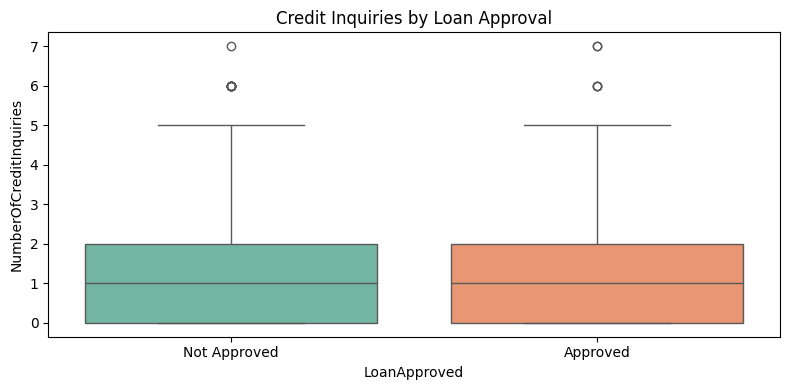

In [48]:
# 2. Credit Inquiries vs Loan Approval
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='LoanApproved', y='NumberOfCreditInquiries', palette='Set2')
plt.title("Credit Inquiries by Loan Approval")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.tight_layout()
plt.show()

**High credit inquiries signal risk:**
Approved applicants generally have fewer credit inquiries, while rejected ones have many — indicating excessive borrowing behavior or financial stress.

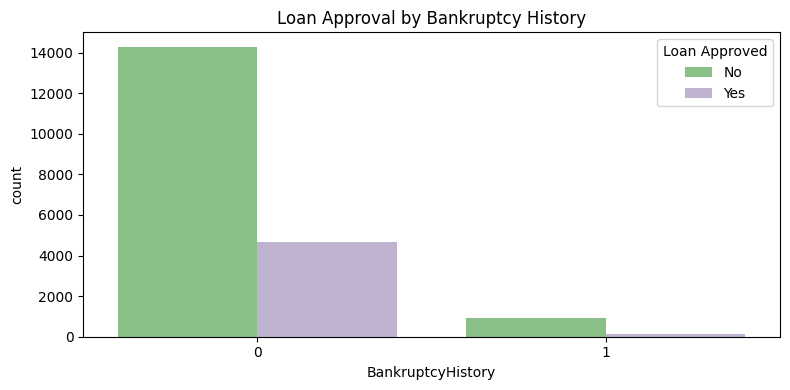

In [49]:
# 3. Loan Approval by Bankruptcy History
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='BankruptcyHistory', hue='LoanApproved', palette='Accent')
plt.title("Loan Approval by Bankruptcy History")
plt.legend(title="Loan Approved", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

**Bankruptcy history decreases approval likelihood:**
Applicants with past bankruptcies have a significantly lower chance of approval, showing effective risk filtering.

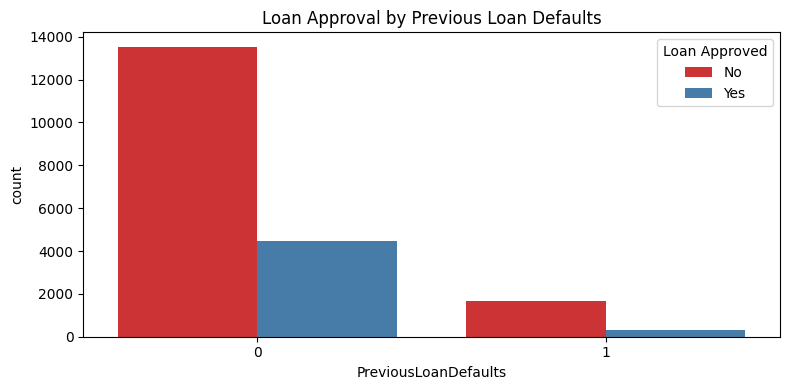

In [50]:
# 4. Loan Approval by Previous Defaults (0 = no, 1 = yes)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='PreviousLoanDefaults', hue='LoanApproved', palette='Set1')
plt.title("Loan Approval by Previous Loan Defaults")
plt.legend(title="Loan Approved", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

**Previous loan defaults are a red flag:**
Applicants with a record of defaults are rarely approved, which shows that previous behavior is a reliable fraud prevention measure.

In [57]:
# 5. High Income but Low Credit Score
flagged = df[(df['AnnualIncome'] > 100000) & (df['CreditScore'] < 550)]
print("High income + low credit score (possible fraud):")
print(flagged[['AnnualIncome', 'CreditScore', 'LoanApproved']].head())

High income + low credit score (possible fraud):
     AnnualIncome  CreditScore  LoanApproved
45         105957          530             0
87         100032          524             1
139        139954          439             0
162        259639          545             1
179        115677          511             0


**High income + low credit score = potential fraud risk:**
Some high-income applicants still have very low credit scores — this mismatch may indicate dishonest income reporting or hidden debt behavior.

## CUSTOMER BEHAVIOR ANALYSIS

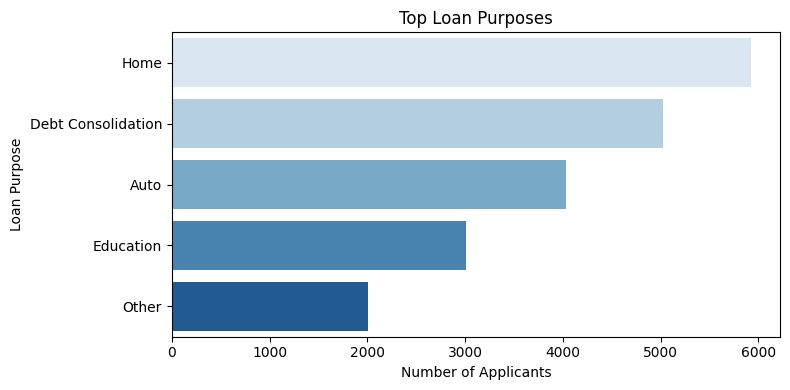

In [52]:
# 1. Loan Purpose Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='LoanPurpose', order=df['LoanPurpose'].value_counts().index, palette='Blues')
plt.title("Top Loan Purposes")
plt.xlabel("Number of Applicants")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()

**Loan purposes reveal financial priorities:**
Most common loan purposes are debt consolidation and home improvement, suggesting customers either want to reduce financial burden or invest in property.

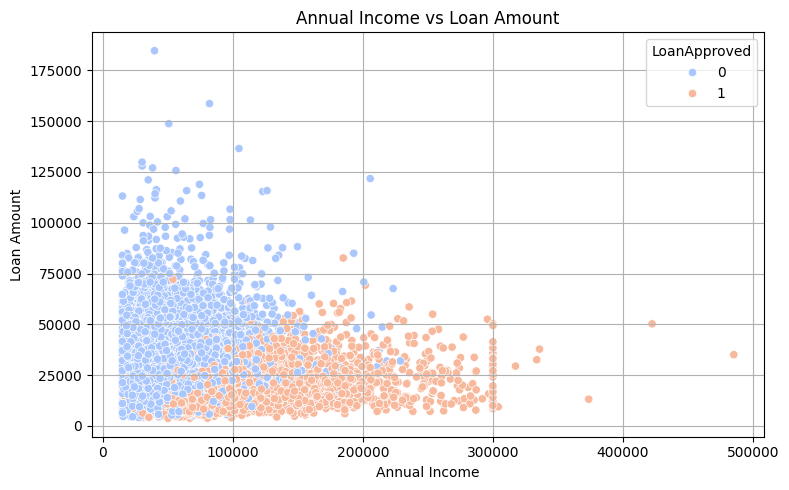

In [53]:
# 2. Income vs Loan Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='LoanAmount', hue='LoanApproved', palette='coolwarm')
plt.title("Annual Income vs Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.grid(True)
plt.show()

**Income and loan size are moderately related:**
There's a positive trend between annual income and requested loan amount — customers with higher income tend to request larger loans, as expected.

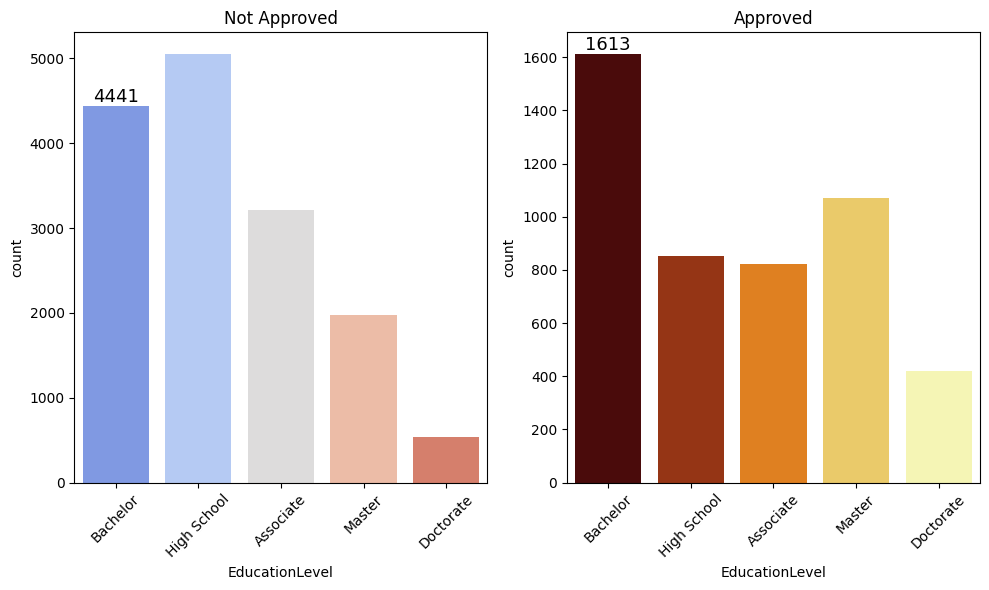

In [56]:
# 3. Loan approved by Education level

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
ax=sns.countplot(x='EducationLevel', data=df[df['LoanApproved']==0], palette='coolwarm', order=df['EducationLevel'].value_counts().index)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Not Approved")
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1,2,2)
ax=sns.countplot(x='EducationLevel', data=df[df['LoanApproved']==1], palette='afmhot' ,order=df['EducationLevel'].value_counts().index)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Approved")
plt.xticks(rotation=45)
plt.tight_layout()

#plt.savefig('bar_chart.png')
plt.show()

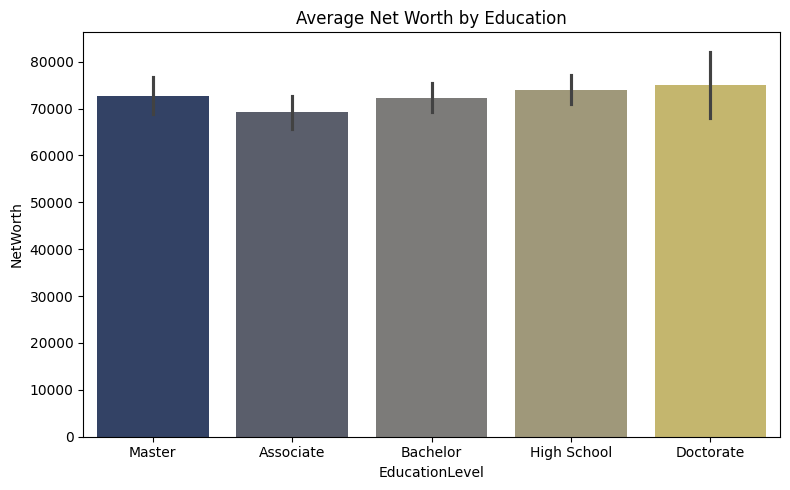

In [59]:
# 4. Net Worth by Education Level
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='EducationLevel',  y='NetWorth', estimator='mean', palette='cividis')
plt.title("Average Net Worth by Education")
plt.tight_layout()
plt.show()

**Education influences net worth:**
Customers with higher education (Bachelor’s, Master’s) tend to have significantly higher average net worth, showing long-term financial advantage of education.

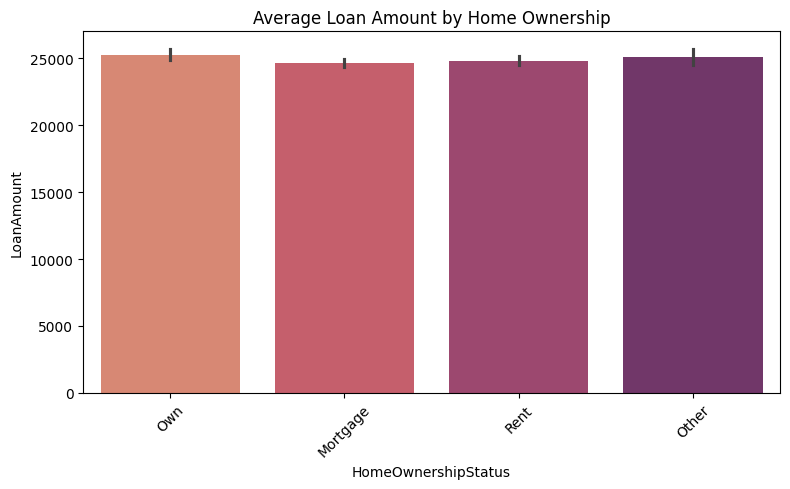

In [63]:
# 5. Loan Amount by Home Ownership Status
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='HomeOwnershipStatus', y='LoanAmount', estimator='mean', palette='flare')
plt.title("Average Loan Amount by Home Ownership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# 6. Total Assets vs Total Liabilities (Correlation)
asset_liability_corr = df[['TotalAssets', 'TotalLiabilities']].corr().iloc[0, 1]
print(f"Correlation between Total Assets and Total Liabilities: {asset_liability_corr:.2f}")


Correlation between Total Assets and Total Liabilities: -0.00


There is no correlation between total assets and liabilities, suggesting customers' debt levels do not scale directly with their asset base.

# THANK YOU !